In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'

In [31]:
DATA_PATH = "./data/平成28年度_データ.csv"

In [46]:
df = pd.read_csv(DATA_PATH,encoding="cp932",index_col=[0],usecols=[i for i in range(22) if i != 2])
df.head()

,健康寿命,感染症及び寄生虫,新生物,血液及び造血器の疾患並びに免疫機能の障害,内分泌栄養及び代謝疾患,精神及び行動の障害,神経系の疾患,眼及び付属器の疾患,耳及び乳様突起の疾患,循環器系の疾患,呼吸器系の疾患,消化器系の疾患,皮膚及び皮下組織の疾患,筋骨格系及び結合組織の疾患,腎尿路生殖器系の疾患,妊娠、分娩及び産褥,周産期に発生した病態,先天奇形、変形及び染色体異常,症状、徴候及び異常臨床所見・異常検査所見で他に分類されないもの,損傷、中毒及びその他の外因の影響
全 国,,,,,,,,,,,,,,,,,,,,
北 海 道,72.931877,1.010837,1.275730,1.003346,1.087793,0.986912,1.103158,0.889851,1.068293,1.212906,0.983049,1.184279,1.030605,1.226395,1.120097,1.013677,1.081316,0.875423,1.042811,1.110112
青 森,73.087508,0.904601,1.146268,1.313999,1.086586,0.886471,0.998642,0.844097,0.791463,1.154894,0.985161,0.968224,0.890937,1.087865,1.014347,1.124698,0.759251,0.853694,0.956259,0.936899
岩 手,72.996266,0.859478,1.088169,1.018963,1.059226,1.169853,1.117686,1.006402,0.763415,1.105906,0.854373,0.953172,0.923909,0.956599,0.985306,1.327434,0.971677,1.067117,0.867846,0.867802
宮 城,73.289795,0.854148,1.062394,1.074177,1.130442,0.976471,1.099496,1.070985,1.034756,1.165786,0.974113,1.049336,0.972946,0.982108,1.055768,1.054304,0.950206,0.881700,0.933923,0.906452
秋 田,73.034934,0.858589,1.300949,1.321807,1.163676,1.043676,1.280547,1.055545,0.908537,1.192262,0.992093,1.263092,0.990362,1.252436,0.998264,1.043846,0.804477,0.829068,1.128897,0.943366


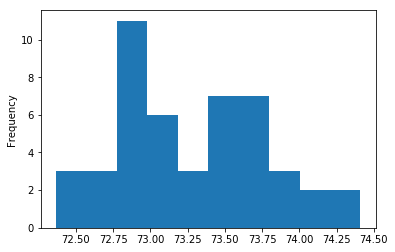

In [62]:
df1 = df.copy()
target  = df1["健康寿命"]
target.describe()
target.plot.hist()

In [76]:
df1 = df.copy()
target  = df1["健康寿命"]
label_func = lambda x : round((x - 72) *  4) 
df1["label"] = target.apply(label_func)
df1["label"].head()

全 国
北 海 道    4
青 森      4
岩 手      4
宮 城      5
秋 田      4
Name: label, dtype: int64

In [77]:
X = df.iloc[:,1:22].values
Y = df1["label"].values
print(X.shape)
print(Y.shape)

(47, 19)
(47,)


In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 

X_train,X_test,Y_train,Y_test = cross_val_score(X,Y,cv=0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

TypeError: estimator should be an estimator implementing 'fit' method, array([[1.01083674, 1.27573021, 1.00334635, 1.08779271, 0.98691176,
        1.10315807, 0.88985125, 1.06829268, 1.21290558, 0.98304901,
        1.18427929, 1.03060534, 1.22639504, 1.12009719, 1.01367659,
        1.08131567, 0.8754225 , 1.04281061, 1.110112  ],
       [0.90460117, 1.14626769, 1.31399888, 1.08658566, 0.88647059,
        0.99864158, 0.84409716, 0.79146341, 1.15489428, 0.98516112,
        0.9682241 , 0.89093676, 1.08786537, 1.01434687, 1.12469831,
        0.7592508 , 0.85369387, 0.95625872, 0.93689856],
       [0.8594777 , 1.08816878, 1.01896263, 1.05922588, 1.16985294,
        1.11768575, 1.00640181, 0.76341463, 1.10590594, 0.85437314,
        0.95317236, 0.92390937, 0.95659876, 0.98530603, 1.32743363,
        0.97167656, 1.06711734, 0.86784551, 0.86780249],
       [0.85414816, 1.06239394, 1.07417736, 1.13044178, 0.97647059,
        1.09949555, 1.07098475, 1.0347561 , 1.16578564, 0.97411319,
        1.04933626, 0.97294555, 0.98210806, 1.05576767, 1.0543041 ,
        0.95020557, 0.88169966, 0.93392275, 0.90645212],
       [0.85858945, 1.30094862, 1.32180703, 1.16367587, 1.04367647,
        1.28054697, 1.0555451 , 0.90853659, 1.19226212, 0.99209315,
        1.26309188, 0.99036185, 1.25243578, 0.99826449, 1.04384553,
        0.80447693, 0.82906808, 1.12889716, 0.94336646],
       [0.84739741, 1.05976687, 1.09760178, 1.13526998, 1.19705882,
        1.04831899, 1.06533609, 0.98597561, 1.15840321, 0.95813702,
        1.01588795, 1.02282719, 1.02223206, 0.91183617, 1.22767498,
        1.03928735, 0.98116852, 0.82084691, 0.92096545],
       [0.84029135, 1.03807074, 0.94478528, 1.07628551, 1.09044118,
        1.02401082, 0.96328375, 1.02317073, 1.11520233, 1.01879231,
        0.92338246, 0.87250592, 0.9728078 , 0.96621543, 1.0237329 ,
        0.84604842, 0.90632545, 0.97487203, 0.88531314],
       [1.0186534 , 0.93988545, 1.02119353, 1.02494568, 0.92955882,
        0.97132059, 0.99962342, 0.84573171, 1.03755013, 0.94611427,
        0.99216055, 0.92289483, 0.9918512 , 0.95036446, 0.88495575,
        0.86843307, 0.89183969, 1.23220102, 0.86291213],
       [0.96144964, 0.93276986, 1.13831567, 1.01327754, 0.885     ,
        0.96181984, 0.96704952, 0.85731707, 1.01353445, 1.01500135,
        1.03553883, 0.98884004, 1.02329495, 1.05923869, 1.02735318,
        0.99908634, 0.99806857, 1.21358772, 0.84966083],
       [0.9817019 , 0.93219714, 1.02007808, 0.99951718, 1.0275    ,
        0.92117305, 0.94050085, 0.88170732, 1.02943857, 1.03433523,
        0.95651719, 0.89871491, 0.95119575, 1.05808169, 0.89823009,
        0.92827775, 0.99710285, 1.06886924, 1.0615239 ],
       [0.93355836, 0.9083639 , 0.99386503, 0.96032832, 0.94897059,
        0.8760462 , 1.0178874 , 0.78780488, 1.01007109, 0.95521256,
        0.95986203, 0.94352384, 0.93250664, 0.97720699, 0.84271923,
        0.85975331, 0.92563979, 1.04653327, 0.92380502],
       [1.00426364, 0.96993413, 0.87785834, 1.03090046, 0.94220588,
        0.85475668, 0.93070985, 0.89878049, 1.03408677, 0.96095316,
        0.95829414, 0.91139669, 1.01948627, 1.09545297, 0.81255028,
        0.92736409, 0.8242395 , 1.12284784, 0.94857233],
       [1.02913484, 0.93498157, 0.91857223, 0.90568923, 0.99176471,
        0.90595189, 1.02861985, 0.90365854, 0.92827196, 1.01797996,
        0.99414654, 1.08437606, 0.90115146, 0.93138956, 0.97184232,
        0.95568753, 0.93095123, 1.0725919 , 0.87821423],
       [0.96464736, 0.94571249, 0.86447295, 0.98873421, 0.99191177,
        0.91917461, 1.0244775 , 0.94634146, 1.02779803, 1.01965881,
        1.01066165, 1.03364897, 0.95775022, 1.08029619, 0.82582462,
        0.86203746, 0.93143409, 1.0753839 , 0.89777567],
       [0.78788417, 1.02483026, 1.12325711, 0.94624608, 1.0525    ,
        1.07214532, 0.94370175, 0.94085366, 0.91277798, 0.98721906,
        0.86652033, 1.00033818, 0.97068202, 0.82332523, 0.92598552,
        0.75057104, 0.92370835, 0.86644951, 0.82552453],
       [0.86214248, 1.06644563, 0.94645845, 1.00394303, 0.94088235,
        1.0738002 , 1.09376765, 0.87195122, 0.95306234, 0.89482805,
        0.86965611, 0.97311464, 1.0530558 , 0.84241583, 0.94489139,
        0.80721791, 0.94495413, 0.91717078, 0.94510175],
       [1.14141055, 1.04280849, 1.17345232, 1.16600949, 1.04235294,
        1.13969834, 1.04048202, 0.87134146, 1.01166606, 0.89168698,
        0.95986203, 1.02299628, 1.09521701, 0.99537198, 0.97506034,
        0.72042028, 1.11009174, 0.9274081 , 1.00631014],
       [0.96073903, 1.14239012, 0.92916899, 1.0155307 , 1.11455882,
        0.98827065, 0.96497835, 0.94878049, 1.06083668, 0.94291904,
        0.88920247, 1.01031451, 1.0829938 , 1.01457827, 1.15969429,
        0.83234354, 1.00965717, 0.86133085, 1.05852658],
       [1.19737076, 0.96423671, 0.78304518, 1.02752072, 1.06867647,
        1.05291206, 1.03087931, 0.72195122, 0.96281444, 1.00801516,
        0.89735549, 1.02705445, 1.12373782, 1.01723938, 0.91391794,
        1.24942896, 0.93964269, 1.0725919 , 1.10790345],
       [0.87635459, 0.93815615, 1.27440045, 0.97867547, 1.11485294,
        1.19036367, 0.87610619, 0.82682927, 0.92786183, 0.81906309,
        0.90425421, 0.80114981, 1.01629761, 0.8972579 , 0.97868061,
        0.96619461, 1.23756639, 0.96323872, 0.98659094],
       [1.03055605, 0.96205639, 1.05856107, 0.98897562, 0.92970588,
        0.90775021, 0.96008285, 1.025     , 0.95584214, 1.0320065 ,
        0.91010766, 0.99492729, 0.94729849, 0.99826449, 0.91673371,
        0.94563728, 0.90439401, 0.84737087, 0.8725351 ],
       [0.95505418, 0.9098511 , 0.81929727, 1.01416271, 0.93632353,
        0.96694399, 1.03219733, 0.98597561, 0.96167517, 0.9683726 ,
        0.94104735, 0.95485289, 0.98255093, 1.05391646, 0.92518101,
        0.96482412, 0.89328827, 0.96510005, 0.91323553],
       [0.92662995, 0.87465148, 0.99888455, 0.96563933, 1.00470588,
        0.86716581, 1.05479194, 1.14329268, 0.87568356, 1.0366098 ,
        0.92463677, 1.10213054, 0.88237378, 0.84472984, 0.91230893,
        1.05664687, 0.95702559, 0.77431363, 0.879003  ],
       [0.8957186 , 0.97964164, 1.07250418, 1.07113543, 1.02911765,
        0.98417016, 1.06740727, 0.85365854, 0.92986693, 0.92780937,
        0.92421867, 0.92306392, 0.99202834, 0.99699178, 0.93161706,
        0.9026953 , 0.99517141, 1.08701722, 0.912289  ],
       [0.89998223, 1.00018564, 1.14612381, 0.97650278, 0.87647059,
        1.00513439, 0.95951798, 1.11951219, 0.95183194, 0.87993501,
        0.96007108, 0.94267839, 0.99069973, 0.91472868, 1.12630732,
        0.94380996, 1.14196041, 0.85295486, 0.96576747],
       [1.00230947, 1.01964066, 1.24484105, 0.93385371, 0.90720588,
        0.98591499, 0.99585765, 0.96219512, 0.93884433, 0.91974005,
        1.0048082 , 1.01673994, 1.02028344, 0.99641328, 1.00683829,
        1.01827318, 1.05021729, 0.91996277, 1.02255876],
       [1.09326701, 0.97617692, 1.00111545, 0.97988251, 0.88338235,
        0.92443605, 1.01751083, 1.08414634, 0.93989245, 1.00942323,
        1.03846556, 1.04835982, 0.93365811, 1.01214856, 0.96781979,
        1.07309274, 1.0767745 , 0.97626803, 1.00425935],
       [1.0801208 , 1.03099395, 1.08979364, 1.0187495 , 0.91161765,
        0.97659683, 1.15872717, 1.14329268, 0.94855086, 0.94373138,
        1.01923278, 1.0713561 , 1.01284322, 0.98461182, 0.96419952,
        1.06761078, 1.02800579, 0.98697068, 1.05253194],
       [0.99324925, 1.01226953, 1.33909649, 1.03444114, 0.93205882,
        1.06597331, 0.99642252, 0.95121951, 1.01403573, 0.90598429,
        1.05174036, 0.9059858 , 1.05128432, 1.09290756, 0.97506034,
        0.96893559, 1.01352004, 0.87156817, 1.05600252],
       [1.05738142, 1.03043734, 0.99888455, 0.9753762 , 0.87338235,
        1.04729216, 1.05046131, 1.21158537, 0.98842508, 0.90874628,
        1.20894742, 0.93845113, 1.00212578, 1.10667592, 0.83306517,
        1.05801736, 0.98696282, 1.01395998, 1.05158542],
       [1.17267721, 1.14148462, 1.01840491, 0.94962581, 1.16838235,
        1.30485495, 0.90585577, 1.31829268, 0.94668246, 0.9971297 ,
        0.95463573, 0.90801488, 0.90017715, 1.03818119, 1.08165728,
        1.02832343, 1.08015452, 0.81386691, 1.00757217],
       [1.05045301, 1.11238829, 0.89626325, 1.07371047, 1.35735294,
        1.25181736, 1.0325739 , 1.12804878, 1.03399562, 1.04077985,
        1.03428452, 0.90919851, 1.05934455, 1.06294111, 1.1850362 ,
        1.45317497, 1.04394013, 1.0981852 , 1.15586055],
       [1.08971398, 0.97043926, 1.02342443, 1.11346262, 1.07985294,
        1.10527913, 1.03031444, 1.21890244, 0.97074371, 1.02637422,
        1.05654855, 0.99661819, 0.96749336, 1.05796598, 0.93483508,
        1.04431247, 1.10284886, 1.04327594, 1.11342483],
       [0.99538106, 1.07739855, 0.97434467, 1.02711837, 1.10514706,
        1.03291703, 0.96234231, 1.01585366, 0.93004922, 1.03173572,
        0.98735236, 1.02688536, 0.9506643 , 0.94851325, 1.0237329 ,
        0.96116948, 1.03669725, 1.00744532, 1.07871904],
       [1.01971931, 1.11890042, 1.10094813, 1.0663877 , 1.19882353,
        1.17805253, 1.08021088, 1.15304878, 1.10157674, 1.07181153,
        1.08801087, 0.96905648, 1.10832595, 1.020479  , 1.02051488,
        1.1512106 , 1.05890874, 1.32061424, 1.11689541],
       [1.07479126, 1.02629515, 1.17624094, 1.0875513 , 1.12426471,
        1.2470096 , 1.01901713, 1.19634146, 1.06949508, 1.09054969,
        1.09020592, 0.99814001, 1.05863596, 1.05576767, 1.16009654,
        1.05801736, 1.2351521 , 1.00093067, 1.04322448],
       [1.01776515, 1.02371137, 0.8862242 , 1.08811459, 1.11323529,
        1.07015773, 1.04801356, 1.44512195, 1.0646646 , 0.99176821,
        1.0398244 , 1.10415962, 1.17121346, 1.07346986, 1.0840708 ,
        1.13202376, 1.0931917 , 1.11493718, 1.23489509],
       [1.07461361, 0.9956958 , 0.90518684, 1.04023497, 0.94176471,
        1.01522569, 1.05140275, 1.28963415, 0.9271327 , 1.0195505 ,
        1.00878018, 0.89516402, 1.0979628 , 1.05877589, 1.08045052,
        1.13659205, 1.14775471, 1.10516519, 1.14450229],
       [1.00302008, 0.97033693, 1.28332404, 1.00410397, 1.09647059,
        1.17489302, 0.93240444, 1.29512195, 1.14491433, 0.99929596,
        0.97700429, 0.90700034, 1.31204606, 1.08411431, 1.10539019,
        1.30379169, 0.95895703, 0.86086552, 1.25414103],
       [1.12115829, 1.0449531 , 0.8611266 , 0.95171803, 1.0675    ,
        1.03222274, 0.96234231, 1.04817073, 1.01831936, 1.10630923,
        1.01306575, 1.0331417 , 1.04712135, 0.96066181, 0.95695897,
        1.04157149, 1.18686625, 1.04094928, 1.26660357],
       [1.32723397, 1.15546484, 1.07919688, 1.17550495, 1.31602941,
        1.2608907 , 1.05573338, 1.10304878, 1.169249  , 1.1180612 ,
        1.05445803, 1.0713561 , 1.1809566 , 1.09036214, 1.03539823,
        1.12562814, 1.18493481, 0.98836668, 1.36551507],
       [0.97246403, 1.10276916, 0.96653653, 0.970548  , 1.05647059,
        1.16863118, 0.94313689, 0.95792683, 1.1167973 , 0.98987273,
        1.06459705, 0.99239094, 1.2023915 , 1.08978364, 1.05229284,
        1.02055733, 1.17141477, 0.89157748, 1.25224799],
       [1.1836916 , 0.93642848, 1.00167317, 1.01182908, 1.11220588,
        1.18135944, 0.95066842, 0.90365854, 1.01868392, 1.11356621,
        1.08675656, 0.94808928, 1.04136404, 1.16684022, 1.33588093,
        1.11100959, 1.04152583, 1.06979991, 1.23978546],
       [1.09042459, 1.05213693, 0.9202454 , 1.10002414, 1.13911765,
        1.04449939, 0.85257014, 0.95731707, 1.0705432 , 1.08334687,
        1.19483642, 0.90429489, 1.21780337, 1.19298855, 0.99758648,
        0.9026953 , 1.0140029 , 1.21498371, 1.21028553],
       [0.96198259, 0.91974213, 0.82654768, 0.91985193, 0.89      ,
        0.98291645, 0.92562606, 0.99085366, 1.06607729, 1.06217168,
        0.95474025, 0.94707474, 1.01523472, 1.11512206, 1.40466613,
        1.08999543, 1.08932883, 0.89157748, 1.16611453],
       [0.9568307 , 1.05448006, 0.86447295, 0.96901907, 0.87558824,
        1.12430378, 0.95179815, 0.86951219, 1.04689209, 1.05063634,
        0.95432215, 0.87774772, 1.09698849, 1.14115469, 1.30329847,
        1.27546825, 1.04876871, 0.83434155, 1.1142136 ],
       [0.78397584, 0.75418028, 0.96374791, 0.79737668, 1.05602941,
        0.96828422, 0.8776125 , 0.96463415, 1.01102807, 1.01305172,
        0.81164419, 0.79320257, 0.82710363, 1.0212889 , 1.70876911,
        1.4243947 , 1.13906325, 1.13122382, 0.90250828]]) was passed

In [79]:
from sklearn.svm import SVC

model = SVC(kernel="linear",random_state=None)
model.fit(X,np.round(Y,0))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [102]:
#from sklearn.linear_model import RamdomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X,np.round(Y,0))

/Users/morikawaemi/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
from sklearn.metrics import accuracy_score

pred_train = model1.predict(X)
accuracy_train = accuracy_score(Y,pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)

トレーニングデータに対する正解率： 1.00


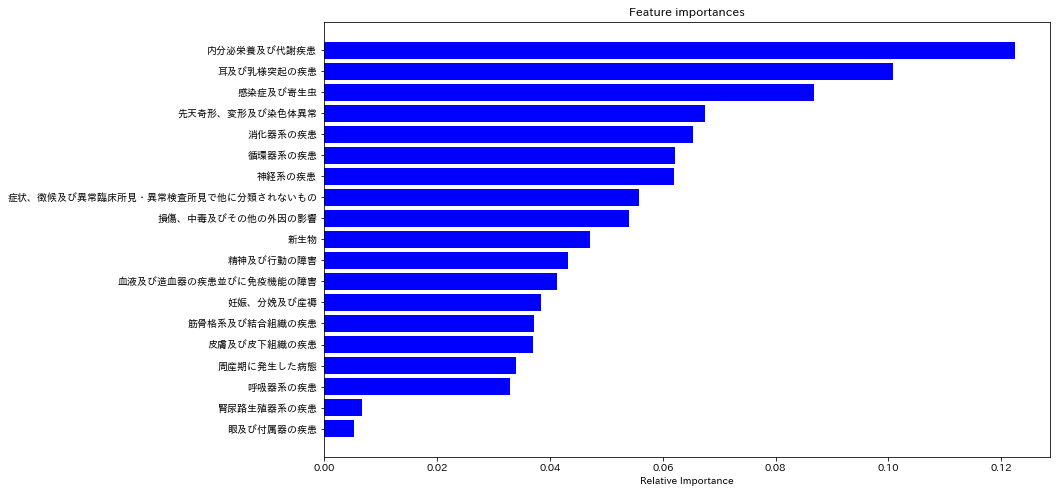

In [118]:
from mlxtend.plotting import plot_decision_regions
from sklearn.manifold import MDS
fig = plt.figure(figsize=(13,8))

importances = model1.feature_importances_
feature = df.columns.to_list()[1:]
indices = np.argsort(importances)

plt.title("Feature importances")
plt.barh(range(len(indices)),importances[indices],color="b",align="center")
plt.yticks(range(len(indices)),[feature[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


In [ ]:
#X_mds = embedding.fit_transform(X)
#plot_decision_regions(X,Y,clf=model,res=0.02)
#plt.show()
embedding = MDS(n_components=2)